## CAR BRAND DETECTION


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 94s 1us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\ujjwa\AppData\Local\Temp/ipykernel_11280/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 32s 20s/step - loss: 8.6174 - accuracy: 0.2500 - val_loss: 4.1934 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 27s 19s/step - loss: 7.1726 - accuracy: 0.2812 - val_loss: 5.5947 - val_accuracy: 0.5690
Epoch 3/50
2/2 [==============================] - 28s 21s/step - loss: 7.7539 - accuracy: 0.4219 - val_loss: 9.7009 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 36s 27s/step - loss: 6.8861 - accuracy: 0.3125 - val_loss: 3.3808 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 38s 27s/step - loss: 3.0378 - accuracy: 0.4375 - val_loss: 4.2848 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 37s 27s/step - loss: 5.4547 - accuracy: 0.3906 - val_loss: 5.7241 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 39s 28s/step - loss: 4.1274 - accuracy: 0.3906 - val_loss: 1.0903 - val_accuracy: 0.6034
Epoch 8/50
2/2 [===========

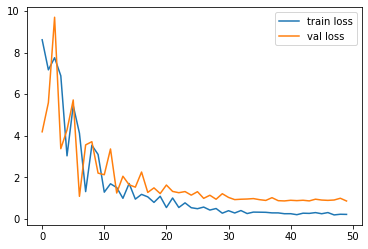

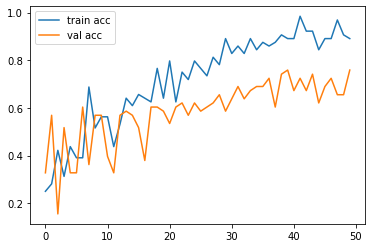

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\ujjwa\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[1.97632797e-03, 9.87755597e-01, 1.02681331e-02],
       [4.92667023e-04, 9.07163322e-01, 9.23440233e-02],
       [3.63026783e-02, 6.25074565e-01, 3.38622779e-01],
       [4.34336513e-02, 6.85126960e-01, 2.71439433e-01],
       [6.54805498e-03, 9.82835114e-01, 1.06168613e-02],
       [2.61109017e-06, 8.82317312e-04, 9.99115050e-01],
       [1.21997744e-01, 7.56458104e-01, 1.21544234e-01],
       [5.87006398e-02, 2.05932051e-01, 7.35367298e-01],
       [8.63327861e-01, 1.05494760e-01, 3.11774239e-02],
       [9.28603113e-02, 1.80394948e-01, 7.26744711e-01],
       [6.71526551e-01, 2.80034989e-01, 4.84385565e-02],
       [1.07991211e-02, 8.92435670e-01, 9.67652723e-02],
       [6.65846989e-02, 7.93146074e-01, 1.40269220e-01],
       [2.68332437e-02, 6.89447343e-01, 2.83719391e-01],
       [6.85425699e-02, 6.29965425e-01, 3.01492035e-01],
       [8.89934693e-03, 9.50651109e-01, 4.04495522e-02],
       [1.53018851e-02, 4.91408305e-03, 9.79784012e-01],
       [1.59105971e-01, 6.74944

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

In [25]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [26]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

array([[0.00100697, 0.00150602, 0.99748695]], dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

In [32]:
a==1

array([False])